# Imports

In [1]:
import librosa as rosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from warnings import warn
import pickle
import os
import IPython.display as ipd
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import scipy.stats as sstats
%matplotlib inline

# Read pickles

In [7]:
with open('/mnt/c/Users/zobni/Programming/UWrMLProjectAudioSeg/data/dataset/dataset1000-0.pickle', 'rb') as f:
    dataset = pickle.load(f)

pc


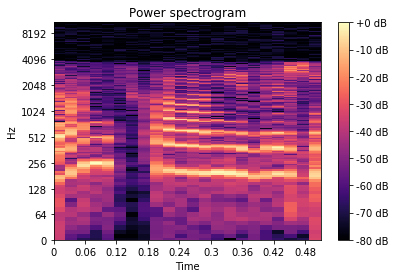

In [8]:
k = 3
exampleSpectrogram = dataset[0][k]
# print(exampleSpectrogram)
exampleLabel = dataset[1][k]
print(exampleLabel)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(exampleSpectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

m


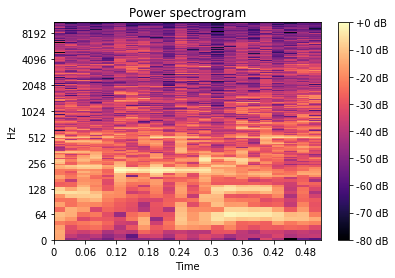

In [9]:
k = 13
exampleSpectrogram = dataset[0][k]
# print(exampleSpectrogram)
exampleLabel = dataset[1][k]
print(exampleLabel)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(exampleSpectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

s


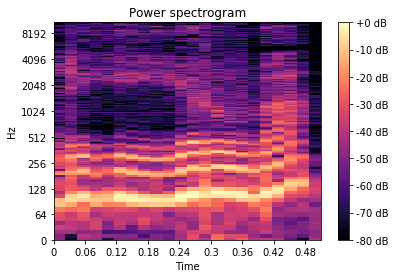

In [10]:
k = 7
exampleSpectrogram = dataset[0][k]
# print(exampleSpectrogram)
exampleLabel = dataset[1][k]
print(exampleLabel)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(exampleSpectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

sm


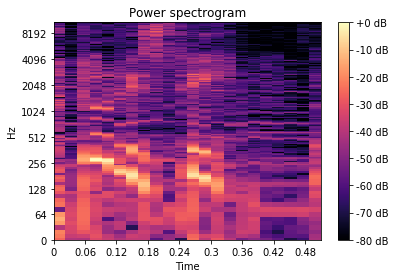

In [11]:
k = 1
exampleSpectrogram = dataset[0][k]
# print(exampleSpectrogram)
exampleLabel = dataset[1][k]
print(exampleLabel)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(exampleSpectrogram,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn import tree

In [18]:
data = np.stack(dataset[0])
labels = np.stack(dataset[1])
trainX, testX, trainY, testY = train_test_split(data, labels, test_size = 0.2, random_state=42, stratify=labels)

In [9]:
ks = np.arange(1,50,1)
trainAccuracies = []
trainBalancedAccuracies = []
trainMacroF1s = []
testAccuracies = []
testBalancedAccuracies = []
testMacroF1s = []
for k in tqdm(ks):
    knnClf = KNeighborsClassifier(n_neighbors=k)
    knnClf.fit(trainX.astype('float32').reshape(-1, 1025*22), trainY)
    trainPreds = knnClf.predict(trainX.astype('float32').reshape(-1, 1025*22))
    testPreds = knnClf.predict(testX.astype('float32').reshape(-1, 1025*22))
    trainAccuracies.append(accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainBalancedAccuracies.append(balanced_accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainMacroF1s.append(f1_score(y_true=trainY, y_pred=trainPreds, average='macro'))
    testAccuracies.append(accuracy_score(y_true=testY, y_pred=testPreds))
    testBalancedAccuracies.append(balanced_accuracy_score(y_true=testY, y_pred=testPreds))
    testMacroF1s.append(f1_score(y_true=testY, y_pred=testPreds, average='macro'))

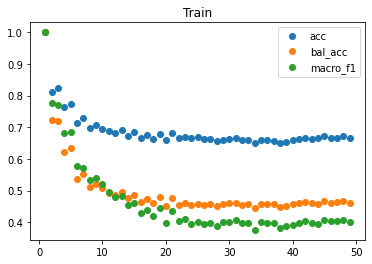

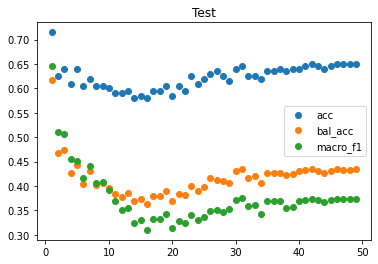

In [10]:
plt.plot(ks, trainAccuracies, 'o')
plt.plot(ks, trainBalancedAccuracies, 'o')
plt.plot(ks, trainMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.title('Train')
plt.show()
plt.plot(ks, testAccuracies, 'o')
plt.plot(ks, testBalancedAccuracies, 'o')
plt.plot(ks, testMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.title('Test')
plt.show()

In [11]:
# depths = np.arange(5,31,5)
# trainAccuracies = []
# trainBalancedAccuracies = []
# trainMacroF1s = []
# testAccuracies = []
# testBalancedAccuracies = []
# testMacroF1s = []
# for depth in tqdm(depths) : 
#     adaClf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=depth), random_state=0, learning_rate=0.5, n_estimators=50)
#     adaClf.fit(trainX.astype('float32').reshape(-1,1025*22), trainY)
#     trainPreds = adaClf.predict(trainX.astype('float32').reshape(-1,1025*22))
#     testPreds = adaClf.predict(testX.astype('float32').reshape(-1,1025*22))
#     trainAccuracies.append(accuracy_score(y_true=trainY, y_pred=trainPreds))
#     trainBalancedAccuracies.append(balanced_accuracy_score(y_true=trainY, y_pred=trainPreds))
#     trainMacroF1s.append(f1_score(y_true=trainY, y_pred=trainPreds, average='macro'))
#     testAccuracies.append(accuracy_score(y_true=testY, y_pred=testPreds))
#     testBalancedAccuracies.append(balanced_accuracy_score(y_true=testY, y_pred=testPreds))
#     testMacroF1s.append(f1_score(y_true=testY, y_pred=testPreds, average='macro'))

In [12]:
# plt.plot(depths, trainAccuracies, 'o')
# plt.plot(depths, trainBalancedAccuracies, 'o')
# plt.plot(depths, trainMacroF1s, 'o')
# plt.legend(['acc','bal_acc','macro_f1'])
# plt.title('Train')
# plt.show()
# plt.plot(depths, testAccuracies, 'o')
# plt.plot(depths, testBalancedAccuracies, 'o')
# plt.plot(depths, testMacroF1s, 'o')
# plt.legend(['acc','bal_acc','macro_f1'])
# plt.title('Test')
# plt.show()

In [19]:
depths = np.arange(5,101,5)
trainAccuracies = []
trainBalancedAccuracies = []
trainMacroF1s = []
testAccuracies = []
testBalancedAccuracies = []
testMacroF1s = []
for depth in tqdm(depths) : 
    rfClf = RandomForestClassifier(max_depth=depth, random_state=0)
    rfClf.fit(trainX.astype('float32').reshape(-1,1025*22), trainY)
    trainPreds = rfClf.predict(trainX.astype('float32').reshape(-1,1025*22))
    testPreds = rfClf.predict(testX.astype('float32').reshape(-1,1025*22))
    trainAccuracies.append(accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainBalancedAccuracies.append(balanced_accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainMacroF1s.append(f1_score(y_true=trainY, y_pred=trainPreds, average='macro'))
    testAccuracies.append(accuracy_score(y_true=testY, y_pred=testPreds))
    testBalancedAccuracies.append(balanced_accuracy_score(y_true=testY, y_pred=testPreds))
    testMacroF1s.append(f1_score(y_true=testY, y_pred=testPreds, average='macro'))

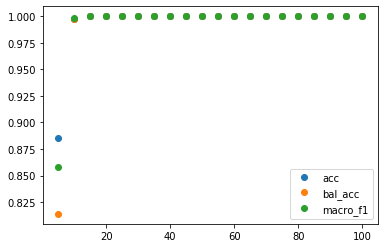

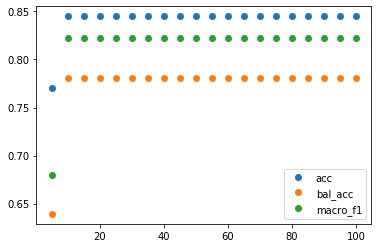

In [20]:
plt.plot(depths, trainAccuracies, 'o')
plt.plot(depths, trainBalancedAccuracies, 'o')
plt.plot(depths, trainMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.show()
plt.plot(depths, testAccuracies, 'o')
plt.plot(depths, testBalancedAccuracies, 'o')
plt.plot(depths, testMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.show()

In [45]:
depths = np.arange(5,101,5)
trainAccuracies = []
trainBalancedAccuracies = []
trainMacroF1s = []
testAccuracies = []
testBalancedAccuracies = []
testMacroF1s = []
for depth in tqdm(depths): 
    treeClf = DecisionTreeClassifier(random_state=420, max_depth=depth)
    treeClf.fit(trainX.reshape(-1, 1025*22), trainY)
    trainPreds = treeClf.predict(trainX.reshape(-1, 1025*22))
    testPreds = treeClf.predict(testX.reshape(-1, 1025*22))
    trainAccuracies.append(accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainBalancedAccuracies.append(balanced_accuracy_score(y_true=trainY, y_pred=trainPreds))
    trainMacroF1s.append(f1_score(y_true=trainY, y_pred=trainPreds, average='macro'))
    testAccuracies.append(accuracy_score(y_true=testY, y_pred=testPreds))
    testBalancedAccuracies.append(balanced_accuracy_score(y_true=testY, y_pred=testPreds))
    testMacroF1s.append(f1_score(y_true=testY, y_pred=testPreds, average='macro'))

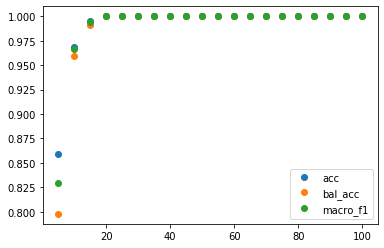

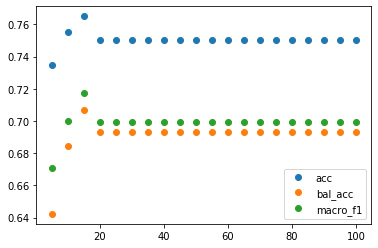

In [46]:
plt.plot(depths, trainAccuracies, 'o')
plt.plot(depths, trainBalancedAccuracies, 'o')
plt.plot(depths, trainMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.show()
plt.plot(depths, testAccuracies, 'o')
plt.plot(depths, testBalancedAccuracies, 'o')
plt.plot(depths, testMacroF1s, 'o')
plt.legend(['acc','bal_acc','macro_f1'])
plt.show()

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(treeClf, filled=True, max_depth=5)
plt.savefig('tree.pdf')

# Training HMM

In [47]:
from sklearn.preprocessing import LabelEncoder
from pomegranate import HiddenMarkovModel
from pomegranate.distributions import DiscreteDistribution
import pomegranate as pg

In [60]:
with open('/mnt/c/Users/zobni/Programming/UWrMLProjectAudioSeg/data/dataset/dataset1000-0.pickle', 'rb') as f:
    train_dataset_1 = pickle.load(f)
    
with open('/mnt/c/Users/zobni/Programming/UWrMLProjectAudioSeg/data/dataset/dataset1000-2.pickle', 'rb') as f:
    train_dataset_2 = pickle.load(f)
    
with open('/mnt/c/Users/zobni/Programming/UWrMLProjectAudioSeg/data/dataset/dataset1000-1.pickle', 'rb') as f:
    test_dataset = pickle.load(f)

In [61]:
train_X = np.concatenate([np.stack(train_dataset_1[0]).reshape(-1, 1025*22), 
                         np.stack(train_dataset_2[0]).reshape(-1, 1025*22)])

train_y = np.concatenate([np.stack(train_dataset_1[1]),
                         np.stack(train_dataset_1[1])])

test_X = np.stack(test_dataset[0]).reshape(-1, 1025*22)
test_y = np.stack(test_dataset[1])

In [71]:
class smoothHMM:

    def __init__(self, predictor, state_names):

        self.predictor = predictor
        self.modelHMM = HiddenMarkovModel()
        self.le=LabelEncoder()
        self.state_names = state_names

    def fit(self, X, y):
        
        X_simplified = self.le.fit_transform(self.predictor.predict(X)).reshape(1, -1)
        
        y = y.reshape(1, -1)

        self.modelHMM = self.modelHMM.from_samples(DiscreteDistribution, len(self.state_names), X_simplified, labels = y,
                                   algorithm='labeled', state_names=self.state_names , verbose = True)
        self.modelHMM.bake()
           

    def predict(self, X):

        X_simplified = self.le.transform(self.predictor.predict(X)).tolist()
        
        return self.modelHMM.predict(X_simplified)
    
    def score(self, X, y):
        
        target = self.predict(X)
        
        y = self.le.transform(y)
        
        print(target)
        print(y)
        
        return np.sum(target==y)/y.shape[0]

In [74]:
print(train_X.shape)

(2000, 22550)


In [75]:
print(train_y.shape)

(2000,)


In [72]:
hmm = smoothHMM(treeClf, state_names=['m', 'pc', 's', 'sm'])
hmm.fit(train_X, train_y)

[1] Improvement: 71.3570723259877	Time (s): 0.003011
[2] Improvement: 0.0	Time (s): 0.003195
Total Training Improvement: 71.3570723259877
Total Training Time (s): 0.0101


In [73]:
hmm.score(test_X, test_y)

[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

0.544